In [3]:
import pandas as panda

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
data = panda.read_csv("Ruter_data.csv", sep=";")

In [9]:
data.shape

(6000, 17)

In [ ]:
#Visualization before removing outliers

Text(0, 0.5, 'Frequency')

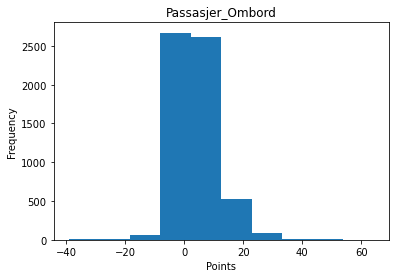

In [16]:
# create figure and axis using matplotlib
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['Passasjerer_Ombord'])
# set title and labels
ax.set_title('Passasjer_Ombord')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

In [7]:
# Removing outlier Passasjerer_Ombord

In [8]:
threshold_max = data['Passasjerer_Ombord'].quantile(0.99)

In [12]:
threshold_min = data['Passasjerer_Ombord'].quantile(0.01)

In [13]:
new_dataframe = data[(data['Passasjerer_Ombord'] <threshold_max) & (data['Passasjerer_Ombord'] >threshold_min)]

In [14]:
new_dataframe.shape

(5879, 17)

In [ ]:
#Visualization after removing outliers

Text(0, 0.5, 'Frequency')

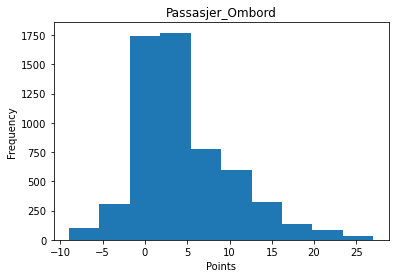

In [17]:
fig, ax = plt.subplots()
ax.hist(new_dataframe['Passasjerer_Ombord'])
ax.set_title('Passasjer_Ombord')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

In [ ]:
# Resten er noe ikke ferdig

In [160]:
data[["LinjeId", "Klokkeslett"]] = data["TurId"].str.split("T", expand=True)


In [161]:
data[["Klokkeslett","Tidsone"]] = data["Klokkeslett"].str.split("+", expand=True)

In [162]:
data[["LinjeId","År","Måned","Dag" ]] = data["LinjeId"].str.split("-", expand=True)

In [163]:
data.head()

,TurId,Dato,Passasjerer_Ombord,Kommune,Linjenavn,LinjeId,Klokkeslett,Tidsone,År,Måned,Dag
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,5,Bærum,150,15006,10:24:00,02:00,2020,08,10
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,5,Bærum,150,15002,12:54:00,02:00,2020,08,15
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,6,Bærum,150,15004,09:54:00,02:00,2020,08,03
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,10,Bærum,150,15003,13:00:00,02:00,2020,07,27
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,10,Bærum,150,15002,07:15:00,02:00,2020,08,27


In [148]:
data.sort_values(by=['LinjeId'])

,TurId,Dato,Passasjerer_Ombord,Kommune,Linjenavn,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,LinjeId,Klokkeslett,Tidsone,År,Måned,Dag
895,10001-2020-08-02T08:00:00+02:00,02/08/2020,3,Lillestrøm,100,08:55:00,08:55:27,08:53:00,08:53:00,151,3,10001,08:00:00,02:00,2020,08,02
2507,10001-2020-08-09T18:10:00+02:00,09/08/2020,-8,Lillestrøm,100,18:53:56,18:54:02,18:51:00,18:51:00,151,-8,10001,18:10:00,02:00,2020,08,09
5670,10001-2020-06-26T14:50:00+02:00,26/06/2020,12,Lillestrøm,100,15:58:11,15:59:01,15:43:00,15:43:00,151,12,10001,14:50:00,02:00,2020,06,26
689,10001-2020-08-30T18:10:00+02:00,30/08/2020,0,Lillestrøm,100,19:05:55,19:06:01,19:04:00,19:04:00,151,0,10001,18:10:00,02:00,2020,08,30
162,10001-2020-07-23T16:50:00+02:00,23/07/2020,24,Alna,100,17:05:15,17:05:23,17:05:00,17:05:00,151,24,10001,16:50:00,02:00,2020,07,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,9113-2020-07-12T18:59:00+02:00,12/07/2020,0,Sagene,91,19:02:16,19:02:50,19:01:00,19:01:00,106,0,9113,18:59:00,02:00,2020,07,12
5491,9113-2020-07-12T14:09:00+02:00,12/07/2020,0,Grünerløkka,91,14:20:39,14:21:12,14:20:00,14:20:00,106,0,9113,14:09:00,02:00,2020,07,12
1503,9401-2020-07-29T15:16:00+02:00,29/07/2020,1,Nordstrand,4B,15:18:35,15:19:17,15:18:00,15:18:00,106,1,9401,15:16:00,02:00,2020,07,29
5163,9402-2020-07-31T22:21:00+02:00,31/07/2020,2,Nordstrand,4B,22:15:01,22:22:29,22:21:00,22:21:00,106,2,9402,22:21:00,02:00,2020,07,31
